# A Brief Season-Wise Analysis on the Success Rates of three Indian IPL Teams (CSK,KKR,MI)

A brief analysis on the performances of Chennai Super Kings(CSK), Kolkata Knight Riders (KKR), Mumbai Indians(MI) in each season. 

### The source of all the three datasets is Wikipedia.

The links for the datasets are: 
1) https://en.wikipedia.org/wiki/List_of_Kolkata_Knight_Riders_records#By_season 
2) https://en.wikipedia.org/wiki/Mumbai_Indians#Overall_results_in_the_IPL
3) https://en.wikipedia.org/wiki/List_of_Chennai_Super_Kings_records#By_season

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
csk = pd.read_csv('csk.csv') 
kkr = pd.read_csv('kkr.csv') 
mi = pd.read_csv('mi.csv')


csk.rename(columns= {'Success Rate':'SR'},inplace = True)
mi.rename(columns= {'% win':'SR'},inplace = True)
kkr.rename(columns= {'SR(%)':'SR'},inplace = True)
csk = csk[['Year','Position','SR']]
kkr = kkr[['Year','Position','SR']]
mi = mi[['Year','Position','SR']]
csk.set_index('Year',inplace=True)
mi.set_index('Year',inplace=True)
kkr.set_index('Year',inplace=True)
mi.loc[:, 'Position'].replace(['Champion'], [1], inplace=True)
csk.replace(['Suspended'], 0,inplace=True)
csk['Position'] = csk['Position'].str.replace(r'[^\d]+', '') 
csk['Position'] = csk['Position'].str.replace(r'[^\d]+', '') 
kkr['Position'] = kkr['Position'].str.replace(r'[^\d]+', '')
csk['SR'] = csk['SR'].str.rstrip('%')
kkr['SR'] = kkr['SR'].str.rstrip('%') 
mi['SR'] = mi['SR'].str.rstrip('%')
csk = csk.astype(float)
kkr = kkr.astype(float)
mi = mi.astype(float) 
mi = mi[:-1]
csk = csk[:-1]
csk.fillna(0, inplace=True)
csk.index = csk.index.astype(int)
mi.index = mi.index.astype(int)
kkr.index = kkr.index.astype(int)

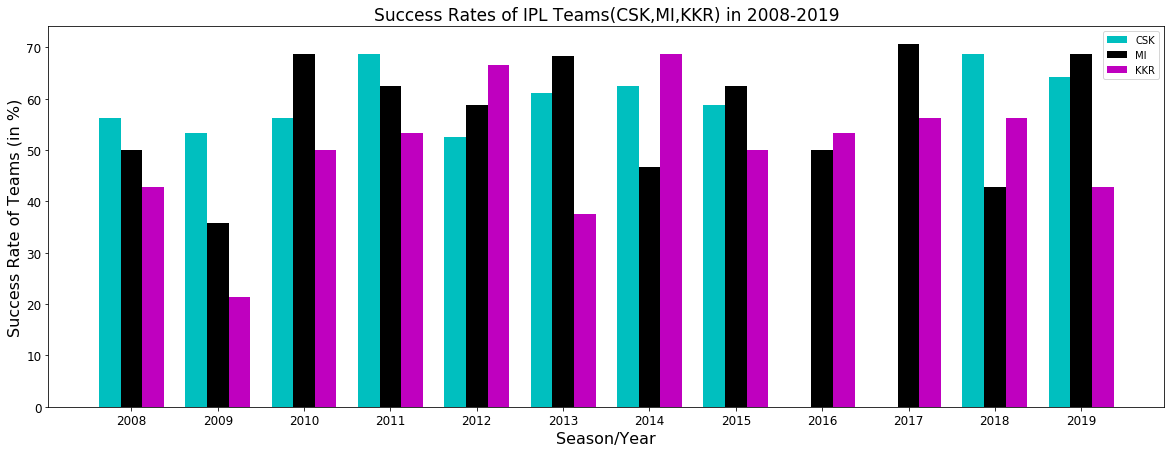

In [3]:
plt.figure(figsize=(20,7)) 
c = len(csk.index)
ax = plt.subplot(111)
ax.bar(csk.index-0.25, csk['SR'], width=0.25, color='c', align='center', label='CSK')   
ax.bar(csk.index, mi['SR'], width=0.25, color='k', align='center', label='MI')
ax.bar(csk.index+0.25, kkr['SR'], width=0.25, color='m', align='center', label='KKR')
plt.xlabel('Season/Year', fontsize=16)
plt.ylabel('Success Rate of Teams (in %)', fontsize=16)
plt.title('Success Rates of IPL Teams(CSK,MI,KKR) in 2008-2019', fontsize=17)
plt.legend()
ax.set_xticks(np.arange(2008,2020,1))
ax.tick_params(labelsize=12)
plt.show()